# Predicting Cancer Status in the "Breast Cancer Wisconsin" Data Set

The Breast Cancer Wisconsin Data set consists of 699 samples of tissue collected between 1989-1991 donated by Dr. Wolberg, a medical doctor involved in cancer research.

For each sample, nine features were collected, as well as the diagnosis of *benign* vs. *cancerous* (approximately 2/3 benign, 1/3 cancerous).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

%matplotlib inline


# 1. code number            id number
# 2. Clump Thickness               1 - 10
# 3. Uniformity of Cell Size       1 - 10
# 4. Uniformity of Cell Shape      1 - 10
# 5. Marginal Adhesion             1 - 10
# 6. Single Epithelial Cell Size   1 - 10
# 7. Bare Nuclei                   1 - 10
# 8. Bland Chromatin               1 - 10
# 9. Normal Nucleoli               1 - 10
# 10. Mitoses                       1 - 10
# 11. Class:   2 for benign, 4 for cancer


breast_cancer = pd.read_csv('breast_cancer.txt', header = None, 
names = ['code','clump_thickness', 'unif_cell_size','unif_cell_shape', 'adhesion', 'epi_cell_size','bn','bc','nn','mit','class'])

In [2]:
breast_cancer['class'].value_counts()
#Not so imbalnced

2    458
4    241
Name: class, dtype: int64

In [5]:
breast_cancer.head()

,code,clump_thickness,unif_cell_size,unif_cell_shape,adhesion,epi_cell_size,bn,bc,nn,mit,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Exploratory Data Analysis

Since there are so few features, let's do a quick spot check about whether any of them individually appear to be very strong indicators of the target (cancer). 

Because the features are discrete-valued (integers, rather than real-valued), we'll first randomly "jitter" the feature and target coordinates to produce a graphic that resembles a simple density plot.

In [24]:
jittered_values = []

for index in list(range(len(breast_cancer))):
    jittered_values.append( breast_cancer['class'][index]+ np.random.uniform(0, 1.5))
    
def jitter_data(series):
    jittered = []
    for index in list(range(len(series))):
        jittered.append(series[index]+ np.random.uniform(-.25, 0.5))
    return jittered

In [7]:
breast_cancer['jitter_class'] = jittered_values

Text(0, 0.5, 'Benign       VS.       Cancer')

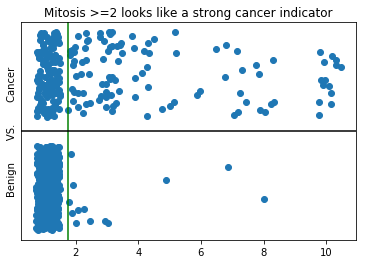

In [75]:
#for feature in list(breast_cancer.keys()):

plt.plot(jitter_data(breast_cancer['mit']), breast_cancer['jitter_class'], 'o')
plt.title('Mitosis >=2 looks like a strong cancer indicator')
plt.axvline(x = 1.75,color ='g')
plt.axhline(y = 3.75,color ='black')
plt.yticks([])
plt.ylabel('Benign       VS.       Cancer')

#mit_bi = []
#for index in list(range(len(breast_cancer))):
#    mit_bi.append(int(breast_cancer['mit'][index]>=3))

Observe in the previous figure that, *conditioned on the Mitosis feature taking value greater than or equal to 2, the probability the sample is diagnosed as "cancer" rises dramatically.* This corresponds to the data that falls to the right of the green vertical divider.

Let's check whether similar thresholds appear to exist for the other features.

Text(0, 0.5, 'Benign       VS.       Cancer')

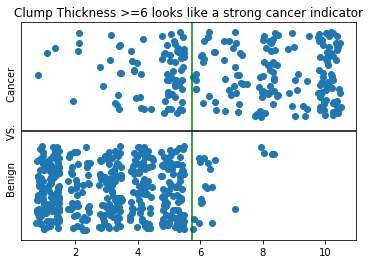

In [83]:
plt.plot(jitter_data(breast_cancer['clump_thickness']), breast_cancer['jitter_class'], 'o')
plt.title('Clump Thickness >=6 looks like a strong cancer indicator')
plt.axvline(x = 5.75,color ='g')
plt.axhline(y = 3.75,color ='black')
plt.yticks([])
plt.ylabel('Benign       VS.       Cancer')


Text(0, 0.5, 'Benign       VS.       Cancer')

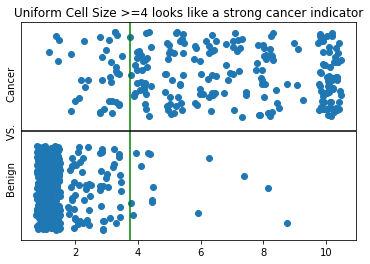

In [77]:
plt.plot(jitter_data(breast_cancer['unif_cell_size']), breast_cancer['jitter_class'], 'o')
plt.title('Uniform Cell Size >=4 looks like a strong cancer indicator')
plt.axvline(x = 3.75,color ='g')
plt.axhline(y = 3.75,color ='black')

plt.yticks([])
plt.ylabel('Benign       VS.       Cancer')

Text(0, 0.5, 'Benign       VS.       Cancer')

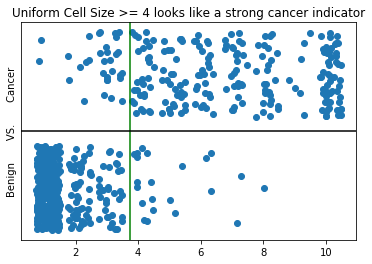

In [82]:
plt.plot(jitter_data(breast_cancer['unif_cell_shape']), breast_cancer['jitter_class'], 'o')
plt.title('Uniform Cell Size >= 4 looks like a strong cancer indicator')

plt.axvline(x = 3.75,color ='g')
plt.axhline(y = 3.75,color ='black')

plt.yticks([])
plt.ylabel('Benign       VS.       Cancer')

Text(0, 0.5, 'Benign       VS.       Cancer')

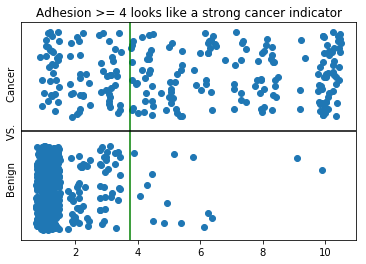

In [81]:
plt.plot(jitter_data(breast_cancer['adhesion']), breast_cancer['jitter_class'], 'o')
plt.title('Adhesion >= 4 looks like a strong cancer indicator')

plt.axvline(x = 3.75,color ='g')
plt.axhline(y = 3.75,color ='black')

plt.yticks([])
plt.ylabel('Benign       VS.       Cancer')

Text(0, 0.5, 'Benign       VS.       Cancer')

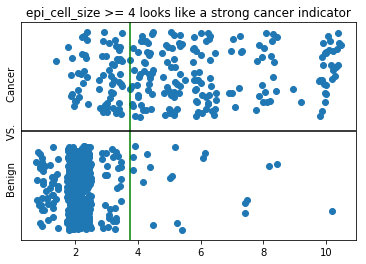

In [88]:
plt.plot(jitter_data(breast_cancer['epi_cell_size']), breast_cancer['jitter_class'], 'o')
plt.title('epi_cell_size >= 4 looks like a strong cancer indicator')

plt.axvline(x = 3.75,color ='g')
plt.axhline(y = 3.75,color ='black')

plt.yticks([])
plt.ylabel('Benign       VS.       Cancer')

Text(0, 0.5, 'Benign       VS.       Cancer')

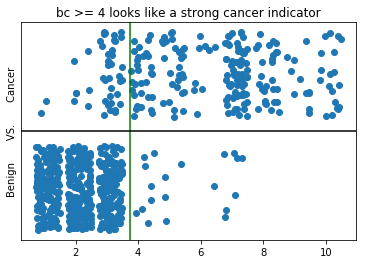

In [87]:
plt.plot(jitter_data(breast_cancer['bc']), breast_cancer['jitter_class'], 'o')
plt.title('bc >= 4 looks like a strong cancer indicator')

plt.axvline(x = 3.75,color ='g')
plt.axhline(y = 3.75,color ='black')

plt.yticks([])
plt.ylabel('Benign       VS.       Cancer')

Text(0, 0.5, 'Benign       VS.       Cancer')

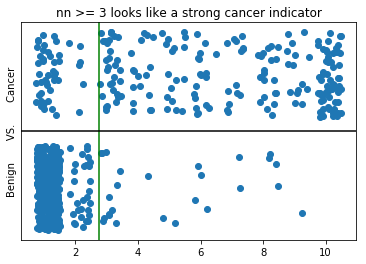

In [86]:
plt.plot(jitter_data(breast_cancer['nn']), breast_cancer['jitter_class'], 'o')
plt.title('nn >= 3 looks like a strong cancer indicator')

plt.axvline(x = 2.75,color ='g')
plt.axhline(y = 3.75,color ='black')

plt.yticks([])
plt.ylabel('Benign       VS.       Cancer')

In [69]:
natural_labels = []

for index in list(range(len(breast_cancer))):
    natural_labels.append(int((breast_cancer['class'][index]-2)/2))
    
breast_cancer['target'] = natural_labels


## Fitting a Model

**On an individual basis, many features appear very promising in their ability to predict the "cancer" label.** 

In particular, for most features there seems to be a **binary split of the range** such features might take, e.g. *"Given that adhesion is at least 4 the conditional probability of cancer is much higher than the probability of cancer in the broader data set."*

Based on this EDA, we consider a **decision tree to be a promising model**. We are hopeful that the predictive power that we observed individually for the various features does not prove to be completely colinear (that is, after splitting on one feature, we hope to find that subsequent splits on other features will continue to reduce the gini impurity).

To **avoid overfitting**, we will split internal nodes only when they contain at least 8 samples, and we require each leaf to contain at least 2 samples. Also, because we are interested in interpretability, we limit the depth of the tree (to focus on the most substantial splits near the root).

In [111]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

X = breast_cancer[['clump_thickness', 'unif_cell_size','unif_cell_shape', 'adhesion', 'epi_cell_size','bc','nn','mit']]
Y = breast_cancer['target']

clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=12, min_samples_leaf=2)

#clf = clf.fit(X, Y)


In [112]:
scores = cross_val_score(clf, X, Y, cv=8)
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


[0.88764045 0.90909091 0.90804598 0.93103448 0.94252874 0.97701149
 0.96551724 0.97701149]
Accuracy: 0.94 (+/- 0.06)


A simple decision-tree classifier delivers **very high accuracy for this classification problem.** 

By using **8-fold cross-validation**, we have confidence that the accuracy range we observe is generalizable and not highly dependent on the precise specification of a particular test set (namely, we haven't leaked too much information about a fixed test set through some exploration of the hyperparamters we introduced - min number of samples for splitting, max tree depth, etc).

Now let's **visualize the trained classifier** (here we will train on all available data).

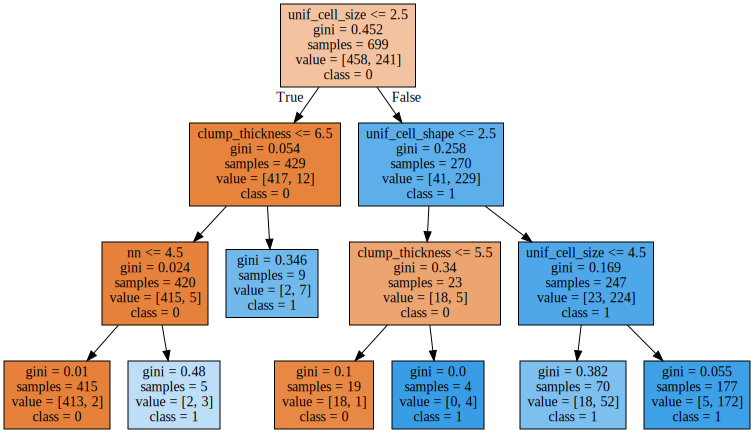

In [115]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=12, min_samples_leaf=2)
clf = clf.fit(X, Y)

labels = X.keys()

graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))